In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# VERİ SETİ YÜKLEME

In [22]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# 1. Veri Seti Seçimi

Bu projede analiz için **Airline Passenger Satisfaction Dataset** seçilmiştir.  
Veri seti, yolcuların memnuniyet düzeyini etkileyebilecek çeşitli değişkenleri içermektedir. Bunlar arasında yolcunun yaşı, cinsiyeti, uçuş mesafesi, seyahat tipi, uçuş sınıfı ve uçuş sırasında aldığı hizmetlere verdiği puanlar yer almaktadır.

- Toplam **103.904 satır**, **25 sütun** içermektedir.
- Hedef değişken: `satisfaction`  
  (İki sınıflı: “satisfied” veya “neutral or dissatisfied”)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Veri Setine Hızlıca Bakış

In [25]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [26]:
df.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]]


,mean,std,min,25%,50%,75%,max
Unnamed: 0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## 2. İstatistiksel Özet

Veri setinde yer alan sayısal değişkenlerin merkezi eğilim (mean, median) ve dağılım ölçüleri (standart sapma, min–max, çeyrek değerler) analiz edilmiştir.

Aşağıda bazı öne çıkan değişkenlerin temel istatistikleri yer almaktadır:

- `Age`: Yolcuların yaş ortalaması **39.4**, minimum yaş **7**, maksimum yaş **85**. Yaş dağılımı 27 (Q1) – 40 (Q2) – 51 (Q3) şeklinde dengelidir.
- `Flight Distance`: Ortalama **1189 km**, minimum **31 km**, maksimum **4983 km**. Uç örnekler olduğu gözlemlenmiştir.
- **Departure Delay in Minutes** ve **Arrival Delay in Minutes**: Bu iki değişken gecikmelerle ilgili olup, yüksek standart sapma değerleri dikkat çekicidir.
- `Departure Delay in Minutes`: Ortalama gecikme **14.8 dk**, maksimum **1592 dk**. Bu alan dikkat çekmektedir.
- Benzer şekilde arrival delay’de de **1584 dakika** maksimum değer gözlenmiştir. Bu değişkenlerde aykırı gözlemler bulunmaktadır.
- Hizmet skorları (örneğin `Seat comfort`, `Inflight entertainment`, `Checkin service`) genelde **2.5 – 3.5** bandında olup, **0–5** aralığında dağılım göstermektedir.



In [29]:
# Eksik Değer Kontrolü

In [31]:
missing = df.isnull().sum()
missing[missing > 0]

,0
Arrival Delay in Minutes,310


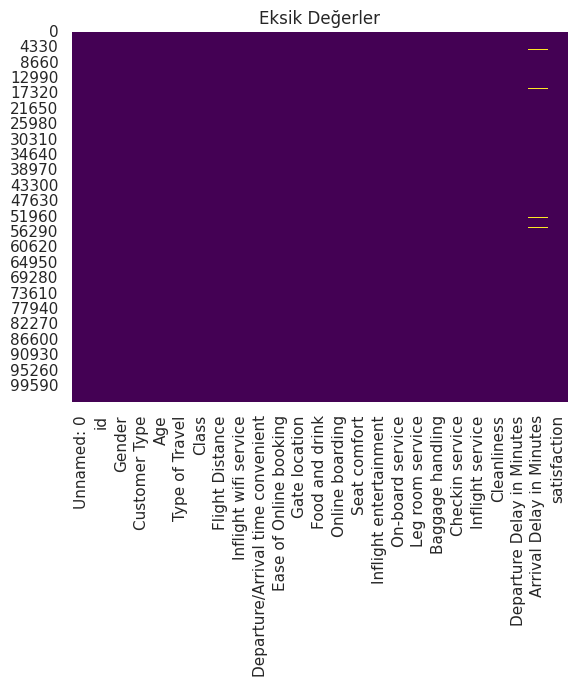

In [32]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Değerler")
plt.show()


Veri setinde eksik değerlerin tespiti için `.isnull().sum()` fonksiyonu kullanılmış ve sadece bir değişkende eksik değer bulunduğu gözlemlenmiştir:

- `Arrival Delay in Minutes`: Bu sütunda toplam **310 eksik değer** bulunmaktadır.

Eksik değerlerin oranı (~%0.3) oldukça düşüktür. Bu değerlerin eksik olma nedeni büyük olasılıkla uçuşun zamanında gerçekleşmesi, veri kaydı eksikliği veya teknik ölçüm hataları olabilir.

Eksik veriler görselleştirilmek amacıyla **seaborn heatmap** yöntemiyle gösterilmiştir. Isı haritasında yalnızca bu sütunun eksik olduğu görülmektedir.

Bu büyüklükteki eksik değer oranı modellemeyi ve analiz sürecini büyük ölçüde etkilemeyeceğinden, eksik veriler;

- Gözlemlerden çıkarılabilir (`dropna()`)
**veya**
- Ortalama/medyan ile doldurulabilir (`fillna()`)


In [34]:
# Aykırı değerler

In [35]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


columns_to_check = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                    'Seat comfort', 'Inflight entertainment', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


outlier_counts = {}
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Değişken', 'Aykırı Değer Sayısı'])
display(outlier_df)



,Değişken,Aykırı Değer Sayısı
0,Age,0
1,Flight Distance,2291
2,Inflight wifi service,0
3,Departure/Arrival time convenient,0
4,Ease of Online booking,0
5,Gate location,0
6,Food and drink,0
7,Online boarding,0
8,Seat comfort,0
9,Inflight entertainment,0


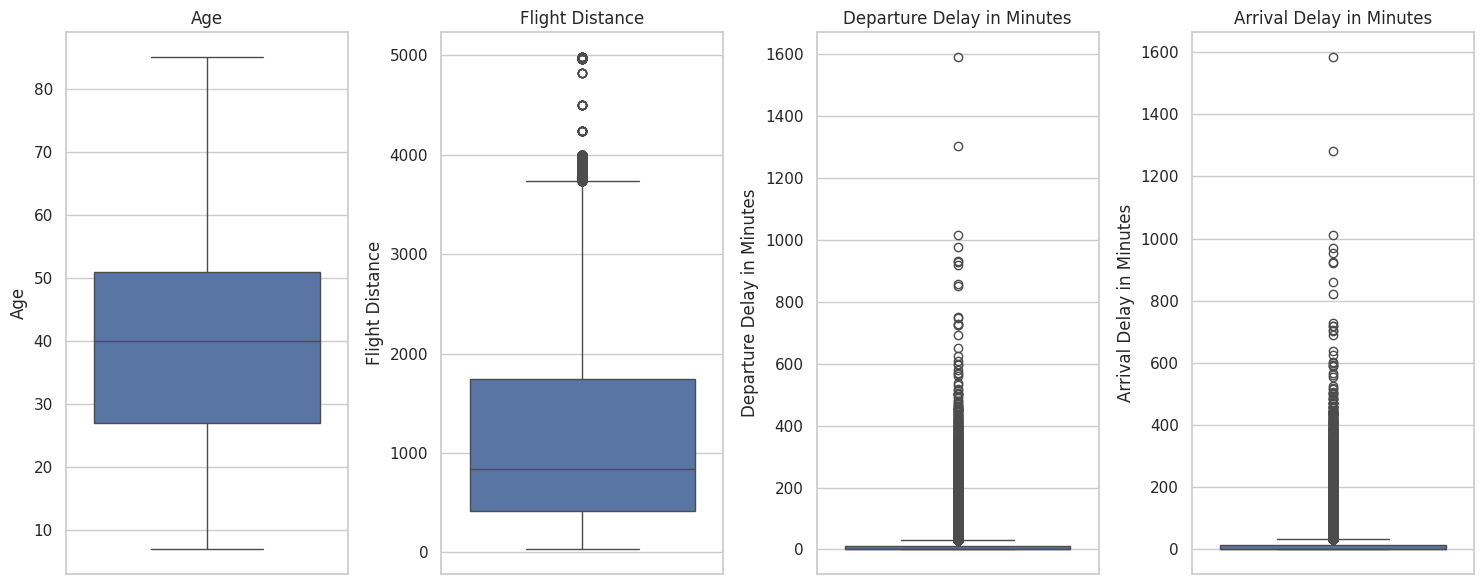

In [36]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
for i, col in enumerate(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



### 4. Aykırı Değer Tespiti (Outlier Detection – IQR Yöntemi)

Sayısal değişkenlerde aykırı değerlerin tespiti büyük önem taşır. Bu kapsamda, bu çalışmada IQR (Interquartile Range – Çeyrekler Arası Aralık) yöntemi kullanılarak aykırı değer analizi gerçekleştirilmiştir.

IQR yöntemiyle yapılan analizde, her bir değişken için 1. çeyrek (Q1) ve 3. çeyrek (Q3) değerleri hesaplanmış, ardından IQR değeri (Q3 – Q1) bulunmuştur. Daha sonra Q1 – 1.5×IQR alt sınırı ile Q3 + 1.5×IQR üst sınırı dışında kalan gözlemler **aykırı değer** olarak kabul edilmiştir.

Bu yöntem, özellikle uçuş mesafesi ve gecikme süreleri gibi değişkenlerde dikkat çeken sonuçlar ortaya koymuştur. Analiz edilen 12 değişken içerisinde sadece 3 tanesinde aykırı değer gözlemlenmiştir:

- **Flight Distance** değişkeninde 2.291 aykırı değer tespit edilmiştir.
- **Departure Delay in Minutes** değişkeninde 14.529 aykırı değer mevcuttur.
- **Arrival Delay in Minutes** değişkeninde ise 13.954 aykırı değer bulunmuştur.

Geri kalan 9 değişkende aykırı değere rastlanmamıştır.

Sonuçlar, özellikle uçuş süresi ve gecikmelere ilişkin verilerin uç değerlere açık olduğunu göstermekte ve bu değişkenlerin analizlerinde dikkatli olunması gerektiğine işaret etmektedir. Görsel olarak da boxplot grafiklerinde bu aykırı değerler net biçimde gözlemlenebilir.

```
# This is formatted as code
```



In [38]:
# Görselleştirme

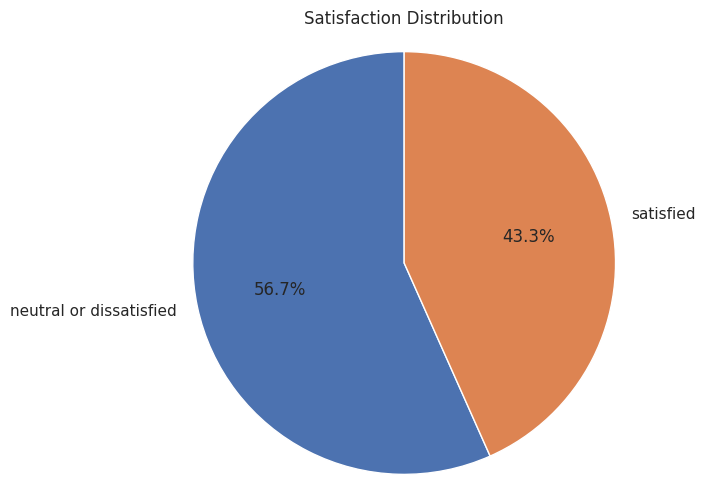

In [39]:
satisfaction_counts = df['satisfaction'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Satisfaction Distribution')
plt.axis('equal')
plt.show()

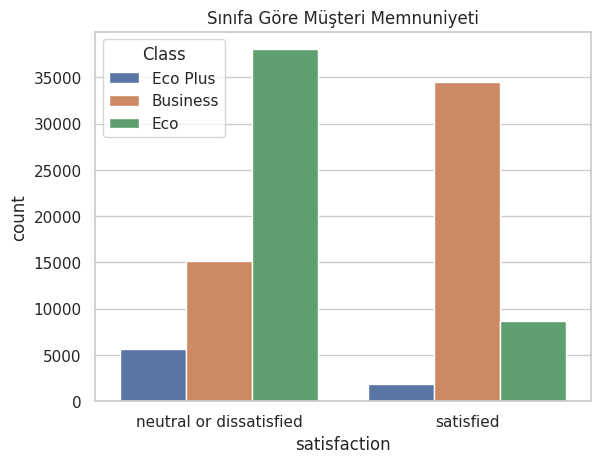

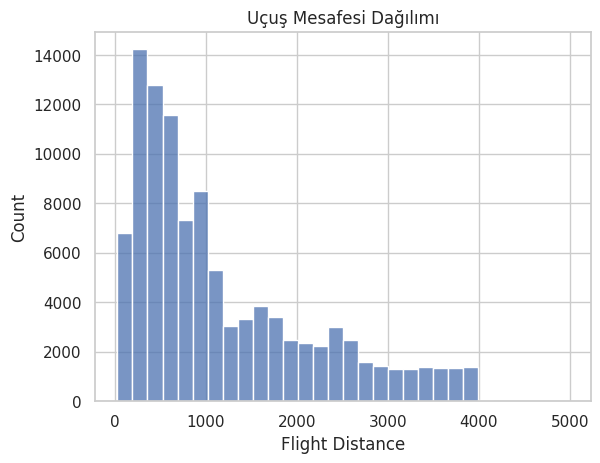

In [40]:
sns.countplot(data=df, x="satisfaction", hue="Class")
plt.title("Sınıfa Göre Müşteri Memnuniyeti")
plt.show()

sns.histplot(df['Flight Distance'], bins=30)
plt.title("Uçuş Mesafesi Dağılımı")
plt.show()


1. Sınıfa Göre Müşteri Memnuniyeti
Yolcuların memnuniyet düzeyi ile uçuş sınıfları arasında belirgin fark gözlemlenmektedir.

Business class yolcularının büyük çoğunluğu memnundur.

Eco sınıfındaki yolcuların önemli bir kısmı memnuniyetsizdir.

Bu bulgu, hizmet kalitesi ve konforun müşteri memnuniyetine etkisini desteklemektedir.


    
2. Uçuş Mesafesi Dağılımı
Çoğu uçuş, 500–2000 km mesafe aralığında yoğunlaşmıştır.

Uzak mesafe uçuşlarının sayısı daha azdır, ancak outlier seviyesinde uzun uçuşlar da mevcuttur.

Veri kümesindeki genel profil, kısa ve orta mesafeli uçuşlardan oluşmaktadır.

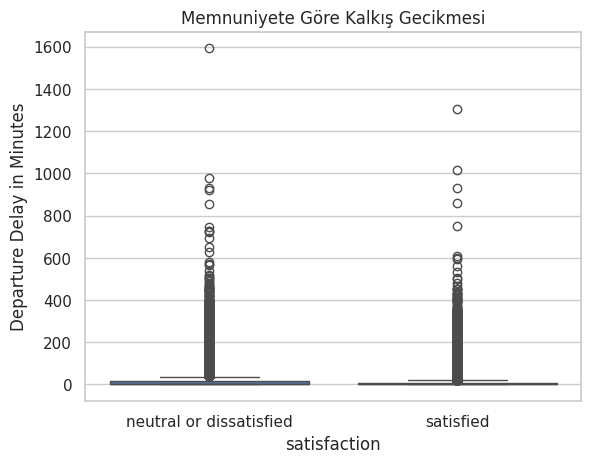

In [42]:
sns.boxplot(data=df, x="satisfaction", y="Departure Delay in Minutes")
plt.title("Memnuniyete Göre Kalkış Gecikmesi")
plt.show()

3. Memnuniyete Göre Kalkış Gecikmesi
Her iki grupta da yüksek gecikmeler gözlemlenmiş olsa da, bazı memnun yolcuların ciddi gecikmelere rağmen şikayetçi olmadığı görülmektedir.

Bu durum, gecikmenin memnuniyet üzerindeki etkisinin tek başına belirleyici olmadığını göstermektedir.

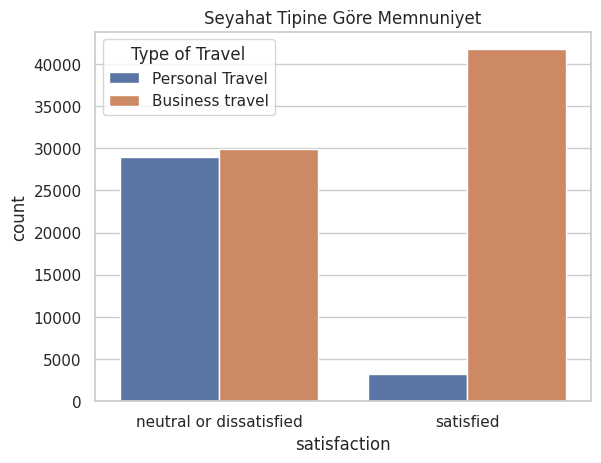

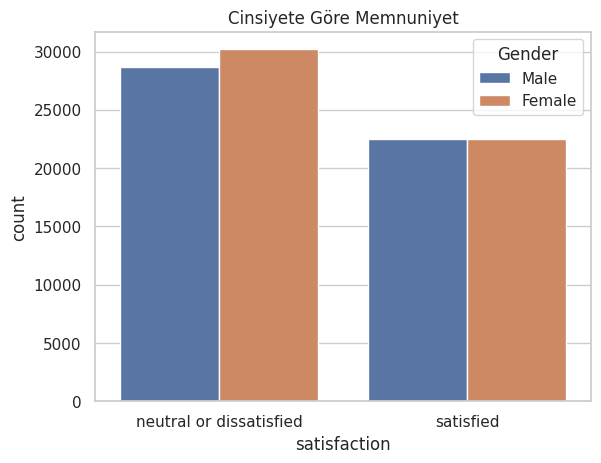

In [45]:

sns.countplot(data=df, x="satisfaction", hue="Type of Travel")
plt.title("Seyahat Tipine Göre Memnuniyet")
plt.show()


sns.countplot(data=df, x="satisfaction", hue="Gender")
plt.title("Cinsiyete Göre Memnuniyet")
plt.show()


4. Seyahat Tipine Göre Memnuniyet
Business travel yapan yolcuların memnuniyet oranı oldukça yüksektir.

Personal travel yapan yolcuların memnuniyet düzeyi daha düşüktür.

Bu fark, iş seyahatlerinin daha organize ve beklentilere uygun hizmetlerle karşılanabileceğini göstermektedir.



5. Cinsiyete Göre Memnuniyet
Kadın ve erkek yolcular arasında memnuniyet düzeyinde belirgin bir fark bulunmamaktadır.

Bu da cinsiyetin memnuniyet düzeyine anlamlı bir etkisi olmadığını göstermektedir.

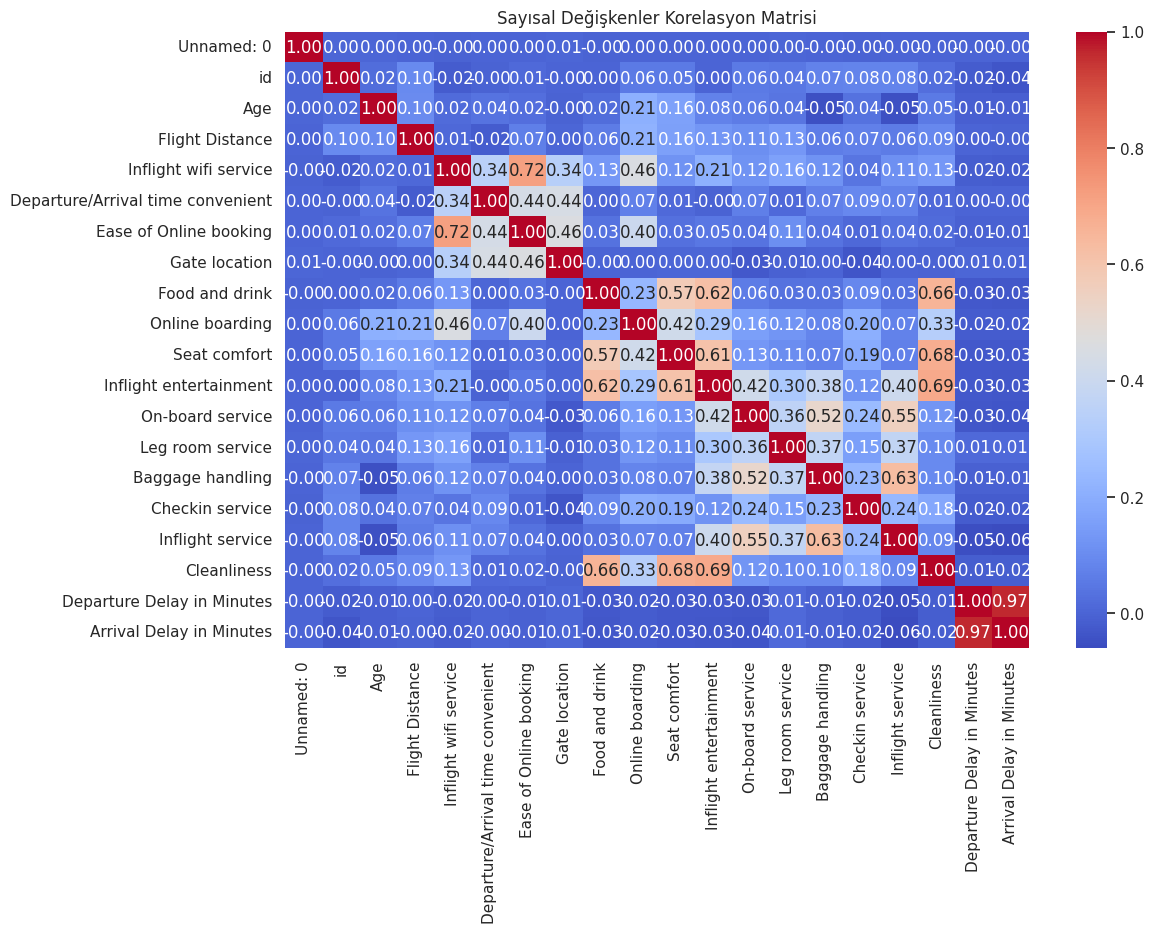

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


6. Korelasyon Matrisi – Sayısal Değişkenler
En güçlü pozitif korelasyon: Departure Delay ↔ Arrival Delay (r ≈ +0.97)

İn-flight hizmet kalitesiyle ilgili değişkenler (örneğin koltuk konforu, yemek, eğlence hizmeti) birbirleriyle orta düzeyde pozitif korelasyon göstermektedir.

Yaş, uçuş mesafesi gibi değişkenlerle memnuniyet arasında zayıf korelasyonlar bulunmuştur.


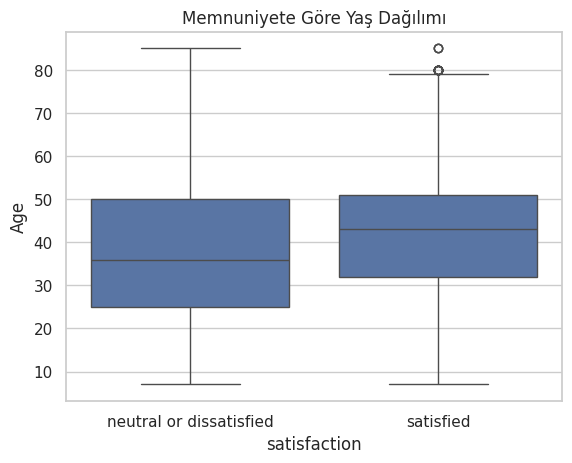

In [47]:
sns.boxplot(data=df, x="satisfaction", y="Age")
plt.title("Memnuniyete Göre Yaş Dağılımı")
plt.show()


7. Memnuniyete Göre Yaş Dağılımı
Memnun yolcuların yaş ortalaması, memnun olmayanlara göre biraz daha yüksektir.

Bu durum, yaş arttıkça memnuniyet olasılığının hafif artabileceğini göstermektedir.

In [48]:
df["satisfaction_binary"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})


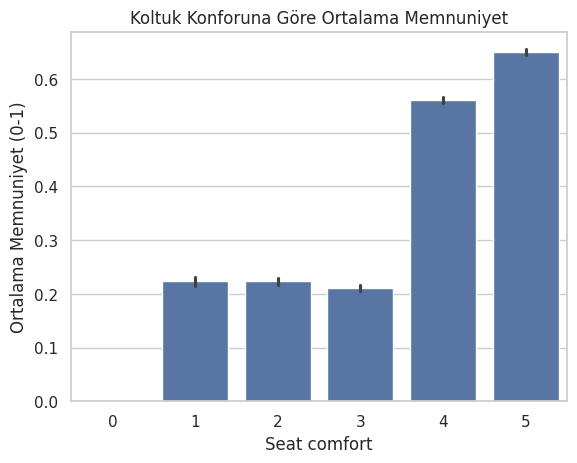

In [49]:
sns.barplot(data=df, x="Seat comfort", y="satisfaction_binary")
plt.title("Koltuk Konforuna Göre Ortalama Memnuniyet")
plt.ylabel("Ortalama Memnuniyet (0-1)")
plt.show()


8. Koltuk Konforuna Göre Memnuniyet Oranı
Koltuk konforu puanı arttıkça, memnuniyet oranı da yükselmektedir.

En yüksek memnuniyet, koltuk konforunun 4 ve 5 puan olduğu durumlarda ortaya çıkmaktadır.

Bu, yolculuk süresince fiziksel konforun önemli bir memnuniyet belirleyicisi olduğunu ortaya koyar.

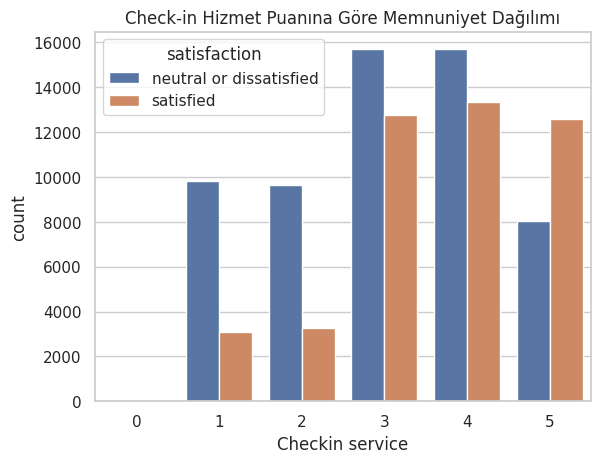

In [50]:
sns.countplot(data=df, x="Checkin service", hue="satisfaction")
plt.title("Check-in Hizmet Puanına Göre Memnuniyet Dağılımı")
plt.show()


9. Check-in Hizmeti Puanına Göre Memnuniyet
Check-in puanı 3’ün üzerinde olan yolcuların büyük kısmı memnundur.

Düşük check-in puanı alan yolcuların memnuniyetsizlik oranı yüksektir.

Bu da check-in sürecinin, müşteri deneyiminde önemli bir temas noktası olduğunu göstermektedir.